In [1]:
import numpy as np
from tables import *
import csv
from tqdm import tqdm_notebook as tqdm

In [2]:
sim_path = "/mnt/disks/sdc/data/similarity.h5"

In [3]:
#years = np.arange(1898,2020)
years = np.arange(2010,2020)

#### Count size all tables

In [6]:
h5file_sim = open_file(sim_path, mode="r", title="similarity")
nb_lines = {}
for year in years:
    nb_lines_y = 0
    for i in range(10):
        table_sim = h5file_sim.get_node('/{}/{}'.format(str(year),i))
        nb_lines_y += len(table_sim)
    nb_lines[year] = nb_lines_y
h5file_sim.close()

In [14]:
h5file_sim = open_file(sim_path, mode="r", title="similarity")
nb_lines = {x:0 for x in range(10)}
for year in [2018]:#in years:
    for i in range(10):
        table_sim = h5file_sim.get_node('/{}/{}'.format(str(year),i))
        nb_lines[i] += len(table_sim)
h5file_sim.close()

In [15]:
nb_lines

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1535799350, 7: 0, 8: 0, 9: 0}

In [105]:
sample_size_table = 10000
#art1,art2,sim,disc1,disc2
sample = np.full((5,sample_size_table*10*len(years)),np.nan)

In [106]:
h5file_sim = open_file(sim_path, mode="r", title="similarity")
nb_lines = 0
sample_count = 0
for year in years:
    for i in tqdm(range(10)):
        table_sim = h5file_sim.get_node('/{}/{}'.format(str(year),i))
        if len(table_sim)>0:
            sample_size_cur = min([sample_size_table,len(table_sim)])
            sample_idx = np.random.choice(len(table_sim),sample_size_cur,replace=False)
            for j in sample_idx:
                line = table_sim[j]
                sample[:3,sample_count] = [line[0],line[1],line[2]]
                sample_count += 1
h5file_sim.close()

/home/User1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


A Jupyter Widget

A Jupyter Widget

In [33]:
info_path = "/mnt/disks/sdb/data/pub_exp_info.txt"

In [68]:
disc_map = {}
with open(info_path, newline='') as f:
    reader = csv.reader(f,delimiter='\t', quoting=csv.QUOTE_NONE)
    next(reader)
    for line in reader:        
        Id_Art = int(line[0])
        disc_map[Id_Art] = line[1]

In [42]:
list_disc = list(set(disc_map.values()))
dict_disc = {x:i for i,x in enumerate(list_disc)}

In [107]:
for c in tqdm(range(sample.shape[1])):
    if ~np.isnan(sample[0,c]):
        art1 = int(sample[0,c])
        art2 = int(sample[1,c])
        if art1 in disc_map.keys():
            sample[3,c] = dict_disc[disc_map[art1]]
        if art2 in disc_map.keys():
            sample[4,c] = dict_disc[disc_map[art2]] 
        

/home/User1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


A Jupyter Widget

In [108]:
nb_disc = len(list_disc)
sum_sim = np.zeros((nb_disc,nb_disc))
count_sim = np.zeros((nb_disc,nb_disc))

In [109]:
for c in tqdm(range(sample.shape[1])):
    disc1 = sample[3,c]
    disc2 = sample[4,c]
    if ~np.isnan(disc1) and ~np.isnan(disc2):
        disc1 = int(disc1)
        disc2 = int(disc2)
        idx = np.sort(np.array([disc1,disc2]))
        sum_sim[idx[1],idx[0]] += sample[2,c]
        count_sim[idx[1],idx[0]] += 1

/home/User1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


A Jupyter Widget

In [113]:
avg_sim = np.divide(sum_sim,count_sim)

In [117]:
dict_disc

{'Arts': 2,
 'Biology': 1,
 'Biomedical Research': 7,
 'Chemistry': 10,
 'Clinical Medicine': 9,
 'Earth and Space': 11,
 'Engineering and Technology': 12,
 'Health': 14,
 'Humanities': 6,
 'Mathematics': 13,
 'Physics': 3,
 'Professional Fields': 5,
 'Psychology': 8,
 'Social Sciences': 4,
 'Unknown': 0}

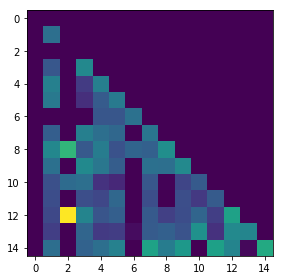

In [114]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(avg_sim)
fig.tight_layout()
plt.show()

In [120]:
same_sim_disc = np.sum(np.diagonal(sum_sim))
same_count_disc = np.sum(np.diagonal(count_sim))
diff_sim_disc = np.sum(np.tril(sum_sim,-1))
diff_count_disc = np.sum(np.tril(count_sim,-1))

In [123]:
avg_same_sim = same_sim_disc/same_count_disc
avg_diff_sim = diff_sim_disc/diff_count_disc


## Check tfidf

In [129]:
from gensim.corpora import MmCorpus, Dictionary
tfidf_path = "/mnt/disks/sdb/data/pub_full_tfidf.mm"
mm_tfidf = MmCorpus(tfidf_path)

In [131]:
data_path = "/mnt/disks/sdb/data/pub_full.h5"
h5file_data = open_file(data_path, mode="r", title="pub_sample")
table_data = h5file_data.root.pub_exp.sample

In [132]:
i = 1
tfidf_test = mm_tfidf[i]
text = [table_data[i][0],table_data[i][1],table_data[i][2]]
print(tfidf_test)
print(text)

[(0, 0.291660451499), (13, 0.0704770509683), (17, 0.115141555998), (27, 0.136356684328), (28, 0.208353964483), (29, 0.166076303383), (30, 0.125427129809), (31, 0.495431516264), (32, 0.157517860311), (33, 0.145579496286), (34, 0.189867689949), (35, 0.132734907101), (36, 0.104678136994), (37, 0.200249846366), (38, 0.253248369647), (39, 0.267538891246), (40, 0.237884197423), (41, 0.172846669776), (42, 0.134397856085), (43, 0.0589358038856), (44, 0.125158628984), (45, 0.0893822294036), (46, 0.0833042403752), (47, 0.330877526707), (48, 0.0762872323471), (49, 0.0748484564886)]
[b'paper deal problem automat design data process algorithm  method suggest optim amount input data comut  basic model system function depend made set element set function defin determinist connect element  algorithm design composit function set', 9416634, 1]


In [133]:
dict_path = "/mnt/disks/sdb/data/dct.p"
dictionary = Dictionary.load(dict_path)

In [142]:
tokens = text[0].decode("utf-8").split()

In [144]:
print(dictionary.doc2bow(tokens))

[(0, 2), (13, 1), (17, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 2), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 3), (48, 1), (49, 1)]


In [143]:
tokens

['paper',
 'deal',
 'problem',
 'automat',
 'design',
 'data',
 'process',
 'algorithm',
 'method',
 'suggest',
 'optim',
 'amount',
 'input',
 'data',
 'comut',
 'basic',
 'model',
 'system',
 'function',
 'depend',
 'made',
 'set',
 'element',
 'set',
 'function',
 'defin',
 'determinist',
 'connect',
 'element',
 'algorithm',
 'design',
 'composit',
 'function',
 'set']